#Algorithms for computing Scores

**All data is taken from [espncricinfo](https://www.espncricinfo.com/)**

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from termcolor import colored
import requests
from bs4 import BeautifulSoup
from collections import Counter
pc = ['#FFB6C1', '#FFA07A', '#FFD700', '#98FB98', '#DDA0DD', '#87CEEB', '#F0E68C', '#FFE4E1', '#98FB98', '#FF69B4']


> This data set contians Bating details of a player.

In [2]:
df = pd.read_csv('Odi_bat.csv')

In [3]:
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 9,Opposition,Ground,Start Date,Unnamed: 13,Player
0,101*,195,121,10,0,83.47,3,not out,1,NaN,v South Africa,Eden Gardens,5 Nov 2023,ODI # 4694,Virat
1,88,139,94,11,0,93.61,3,caught,1,NaN,v Sri Lanka,Wankhede,2 Nov 2023,ODI # 4690,Virat
2,0,12,9,0,0,0.00,3,caught,1,NaN,v England,Lucknow,29 Oct 2023,ODI # 4686,Virat
3,95,154,104,8,2,91.34,3,caught,2,NaN,v New Zealand,Dharamsala,22 Oct 2023,ODI # 4678,Virat
4,103*,113,97,6,4,106.18,3,not out,2,NaN,v Bangladesh,Pune,19 Oct 2023,ODI # 4674,Virat


>Removing the extra features...

In [4]:
df.pop(df.columns[13])

0       ODI # 4694
1       ODI # 4690
2       ODI # 4686
3       ODI # 4678
4       ODI # 4674
           ...    
2562    ODI # 4512
2563    ODI # 4513
2564    ODI # 4558
2565    ODI # 4563
2566    ODI # 4638
Name: Unnamed: 13, Length: 2567, dtype: object

In [5]:
df.pop(df.columns[9])

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2562   NaN
2563   NaN
2564   NaN
2565   NaN
2566   NaN
Name: Unnamed: 9, Length: 2567, dtype: float64

In [6]:
df.pop(df.columns[7])

0       not out
1        caught
2        caught
3        caught
4       not out
         ...   
2562          -
2563          -
2564          -
2565     bowled
2566     bowled
Name: Dismissal, Length: 2567, dtype: object

In [7]:
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Inns,Opposition,Ground,Start Date,Player
0,101*,195,121,10,0,83.47,3,1,v South Africa,Eden Gardens,5 Nov 2023,Virat
1,88,139,94,11,0,93.61,3,1,v Sri Lanka,Wankhede,2 Nov 2023,Virat
2,0,12,9,0,0,0.00,3,1,v England,Lucknow,29 Oct 2023,Virat
3,95,154,104,8,2,91.34,3,2,v New Zealand,Dharamsala,22 Oct 2023,Virat
4,103*,113,97,6,4,106.18,3,2,v Bangladesh,Pune,19 Oct 2023,Virat


1. **Runs:** The total number of runs scored by the player in a particular inning.
  
2. **Mins (Minutes):** The duration, in minutes, for which the player batted during the inning.

3. **BF (Balls Faced):** The number of balls faced by the player in the inning.

4. **4s (Fours):** The number of times the player hit the ball to the boundary, scoring four runs each time.

5. **6s (Sixes):** The number of times the player hit the ball over the boundary, scoring six runs each time.

6. **SR (Strike Rate):** The strike rate is a measure of a player's batting performance, calculated as (Runs/Balls Faced) * 100.

7. **Pos (Position):** The batting position of the player in the inning.

8. **Dismissal:** The manner in which the player got out (e.g., Caught, Bowled, LBW - Leg Before Wicket, etc.).

9. **Inns (Innings):** Indicates the inning number of the match (1st inning, 2nd inning, etc.).

10. **Opposition:** The opposing team against which the player played the inning.

11. **Ground:** The cricket ground or stadium where the match took place.

12. **Start Date:** The date when the inning started.

This table is designed to organize and display statistical information about each inning played by a cricket player.

> We have data of in total 33 players...and with 2567 instance and 12 features to use.

In [8]:
df.shape

(2567, 12)

> Removing the outliers from the data.

In [9]:
df = df[df['Runs'] != 'DNB']
df = df[df['Runs'] != 'TDNB']

In [10]:
df.shape

(1893, 12)

>Assigning value to object data type features.

In [11]:
indian_stadiums = ['Eden Gardens', 'Wankhede', 'Lucknow', 'Dharamsala', 'Pune', 'Ahmedabad', 'Delhi', 'Chennai',
                   'Rajkot', 'Visakhapatnam', 'Indore', 'Hyderabad', 'Thiruvananthapuram', 'Raipur', 'Guwahati',
                   'Bengaluru', 'Cuttack', 'Nagpur', 'Ranchi', 'Mohali']

SA_stadiums = ['Wellington', 'Centurion', 'Johannesburg', 'Cape Town', 'Durban', 'Bloemfontein', 'Paarl',
               'East London', 'Potchefstroom', 'Gqeberha', 'Kimberley']

indian_ply = ['Virat', 'Rohit', 'Ishan', 'Shreyas', 'Rahul', 'Shubman', 'Hardik', 'Jasprit', 'Kuldeep', 'Shami',
              'Axar', 'Shardul', 'Siraj', 'Suryakumar', 'Ashwin', 'Jadeja', 'Krishna']

SA_ply = ['Temba', 'David', 'Rassie', 'Reeza', 'Marco', 'Aiden', 'Quinton', 'Heinrich', 'Andile', 'Gerald', 'Keshav',
          'Lungi', 'Kagiso', 'Tabraiz', 'Lizaad', 'Sisanda', 'Anrich']

for index, row in df.iterrows():
    player = row['Player']
    ground = row['Ground']

    if player in indian_ply and ground in indian_stadiums:
        df.at[index, 'Ground'] = 1
    elif player in SA_ply and ground in SA_stadiums:
        df.at[index, 'Ground'] = 1
    else:
        df.at[index, 'Ground'] = 0


In [12]:
df['Start Date'] = pd.to_datetime(df['Start Date'], format='%d %b %Y')
df['Opposition'] = df['Opposition'].str[2:]

>Adding new features for future useage.

In [13]:
df['Mins'] = pd.to_numeric(df['Mins'], errors='coerce')
df['BF'] = pd.to_numeric(df['BF'], errors='coerce')
df['4s'] = pd.to_numeric(df['4s'], errors='coerce')
df['6s'] = pd.to_numeric(df['6s'], errors='coerce')
df['SR'] = pd.to_numeric(df['SR'], errors='coerce')
df['Ground'] = pd.to_numeric(df['Ground'], errors='coerce')
df['Pos'] = pd.to_numeric(df['Pos'], errors='coerce')
df['Inns'] = pd.to_numeric(df['Inns'], errors='coerce')
df['NO'] = df['Runs'].str.endswith('*').astype(int)
df['Runs'] = df['Runs'].str.replace('*', '')
df['Runs'] = pd.to_numeric(df['Runs'], errors='coerce')

<ipython-input-13-d5edb6518c55>:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Runs'] = df['Runs'].str.replace('*', '')


In [14]:
import numpy as np
conditions = [
    (df['Runs'] >= 100),
    (df['Runs'] >= 50)
]
values = [2, 1]
df['milestone'] = np.select(conditions, values, default=0)

> Now all feature been Numeric data type.

In [15]:
df.describe()

,Runs,Mins,BF,4s,6s,SR,Pos,Inns,Ground,NO,milestone
count,1893.000000,1674.000000,1893.000000,1893.000000,1893.000000,1867.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,32.077655,49.483871,34.075541,2.949287,0.705758,84.262051,4.820919,1.484416,0.409931,0.221342,0.309562
std,36.466988,47.953280,33.633960,3.754147,1.431137,51.671832,2.808577,0.499889,0.491951,0.415260,0.602407
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,5.000000,13.000000,8.000000,0.000000,0.000000,55.550000,3.000000,1.000000,0.000000,0.000000,0.000000
50%,19.000000,33.000000,22.000000,2.000000,0.000000,83.330000,4.000000,1.000000,0.000000,0.000000,0.000000
75%,47.000000,73.000000,50.000000,4.000000,1.000000,106.260000,7.000000,2.000000,1.000000,0.000000,0.000000
max,264.000000,228.000000,173.000000,33.000000,16.000000,600.000000,11.000000,2.000000,1.000000,1.000000,2.000000


> There is no Null values in any features.

In [ ]:
df.isnull().sum()

Runs          0
Mins          0
BF            0
4s            0
6s            0
SR            0
Pos           0
Inns          0
Opposition    0
Ground        0
Start Date    0
Player        0
NO            0
milestone     0
dtype: int64

**Reference** : I have taken a reference for using this algorithms for a reserach paper avaliable at [ScienceDirect](https://www.sciencedirect.com/journal/array).

In [16]:
df['Mins'].fillna(df['Mins'].mean(), inplace=True)
df['SR'].fillna(df['SR'].mean(), inplace=True)

> **Algorithm for batsman :**
> α_batsmen_score_at_each_position = 0.30*run_scored+0.05*notout_innigs+
0.20*bat_avg + 0.15*bat_sr+0.15*milestone_reaching_ability+ 0.10*no_of_4’s_6’s+0.05*high_score-0.05*no_of_zeroes

>β_pos_score =max (α_batsmen_score_at_each_position)

> γ_inningwise_score = 0.40*α_batsmen_score_first_inning+
0.60*α_batsmen_score_seocnd_inning

> x_venue = 0.35*α_batsmen_score_home_matches+0.65*
α_batsmen_score_away_matches

> y_opponent = 0.70*α_batsmen_score_strong_opponent+0.30*
α_batsmen_score_weak_opponent

> w_yearwise = 0.20*α_batsmen_score_current_year+0.80*
α_batsmen_score_last_five_year

> batting_score = 0.25*α_batsmen_score+0.10*β_pos_score+0.15*γ_inningwise_score+0.15*x_venue +0.15*
y_opponent+0.20*w_yearwise


In [18]:
def coun(data):
  if data.shape[0] == 0:
    return 0
  else :
    n= 1/data.shape[0]
  ans = (data['Runs'].sum()*0.3) + (0.05*data[data['NO'] == 1].shape[0]) +(0.20*data['Runs'].mean())\
  +(data['SR'].mean()*0.15) + (15*(data[data['milestone'] == 1].shape[0]+data[data['milestone'] == 2].shape[0])*n) +\
  (0.10 * (data['4s'].sum()+data['6s'].sum())) + (0.05 * data['Runs'].max()) - (0.05 * data[data['Runs'] == 0].shape[0])
  return ans

In [19]:
from datetime import datetime
def count(data,date):
  year =  datetime.strptime(date, "%d %b %Y").year
  data = data[data['Start Date']<=datetime.strptime(date, "%d %b %Y")]
  alpha_batsmen_score = coun(data)
  unp = data['Pos'].unique()
  beta_batsmen_score = 0
  for i in range(len(unp)):
    ans = coun(data[data['Pos'] == unp[i]])
    beta_batsmen_score = max (beta_batsmen_score,ans)
  gemma_batsmen_score = (0.40*coun(data[data['Inns'] == 1])) + (0.60*coun(data[data['Inns'] == 2]))
  x_venue = (0.35*coun(data[data['Ground'] == 1])) + (0.65*coun(data[data['Ground'] == 0]))
  y_opponent = (0.70*coun(data[data['Opposition'] == 'England'])) + (0.30*coun(data[data['Opposition'] == 'Pakistan']))
  w_yearwise =(0.80*coun(data[(data['Start Date'].dt.year >= (year-5)) & (data['Start Date'].dt.year <= year)])) \
  + (0.20*coun(data[data['Start Date'] == year]))
  batting_score = (0.25*alpha_batsmen_score) + (0.10*beta_batsmen_score) +\
  (0.15*gemma_batsmen_score) + (0.15*x_venue) + (0.15*y_opponent) + (0.20*w_yearwise)
  return batting_score

> Example of how the score is counted.

In [21]:
ans = df[df['Player']=='Virat']
count(ans,"28 Feb 2023")

2228.9349327708514

> This data set contains bowling details of a player.

In [22]:
df2 = pd.read_csv('Odi_bow.csv')

1. **Overs:** The number of overs bowled by the player in a particular inning. An over consists of six legal deliveries (bowled by the same bowler).

2. **Mdns (Maidens):** The number of maiden overs bowled by the player in the inning. A maiden over is one in which no runs are scored by the batsman.

3. **Runs:** The total number of runs conceded by the player in the inning.

4. **Wkts (Wickets):** The number of wickets taken by the player in the inning. A wicket is a dismissal of a batsman by the bowler.

5. **Econ (Economy Rate):** The economy rate is a measure of a bowler's efficiency, calculated as (Runs/Overs).

6. **Pos (Position):** The batting position or order of the player in the team.

7. **Inns (Innings):** Indicates the inning number of the match (1st inning, 2nd inning, etc.).

8. **Opposition:** The opposing team against which the player played the inning.

9. **Ground:** The cricket ground or stadium where the match took place.

10. **Start Date:** The date when the inning started.

This table is designed to organize and display statistical information about each bowling performance in cricket. Each row in the table represents a specific inning, and the columns provide details about the player's bowling performance in that inning.

In [23]:
df2.head()

,Overs,Mdns,Runs,Wkts,Econ,Pos,Inns,Unnamed: 7,Opposition,Ground,Start Date,Unnamed: 11,Player
0,DNB,-,-,-,-,-,2,NaN,v Sri Lanka,Dambulla,18 Aug 2008,ODI # 2742,Virat
1,DNB,-,-,-,-,-,1,NaN,v Sri Lanka,Dambulla,20 Aug 2008,ODI # 2745,Virat
2,DNB,-,-,-,-,-,2,NaN,v Sri Lanka,Colombo (RPS),24 Aug 2008,ODI # 2750,Virat
3,DNB,-,-,-,-,-,2,NaN,v Sri Lanka,Colombo (RPS),27 Aug 2008,ODI # 2755,Virat
4,DNB,-,-,-,-,-,1,NaN,v Sri Lanka,Colombo (RPS),29 Aug 2008,ODI # 2756,Virat


> Removing the extra features.

In [24]:
df2.pop(df2.columns[11])

0       ODI # 2742
1       ODI # 2745
2       ODI # 2750
3       ODI # 2755
4       ODI # 2756
           ...    
2562    ODI # 4512
2563    ODI # 4513
2564    ODI # 4558
2565    ODI # 4563
2566    ODI # 4638
Name: Unnamed: 11, Length: 2567, dtype: object

In [25]:
df2.pop(df2.columns[7])

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2562   NaN
2563   NaN
2564   NaN
2565   NaN
2566   NaN
Name: Unnamed: 7, Length: 2567, dtype: float64

>Removing the outliers.

In [27]:
df2 = df2[df2['Overs'] != 'DNB']
df2 = df2[df2['Overs'] != 'TDNB']

>Assigning value to object data type features.

In [28]:
indian_stadiums = ['Eden Gardens', 'Wankhede', 'Lucknow', 'Dharamsala', 'Pune', 'Ahmedabad', 'Delhi', 'Chennai',
                   'Rajkot', 'Visakhapatnam', 'Indore', 'Hyderabad', 'Thiruvananthapuram', 'Raipur', 'Guwahati',
                   'Bengaluru', 'Cuttack', 'Nagpur', 'Ranchi', 'Mohali']

SA_stadiums = ['Wellington', 'Centurion', 'Johannesburg', 'Cape Town', 'Durban', 'Bloemfontein', 'Paarl',
               'East London', 'Potchefstroom', 'Gqeberha', 'Kimberley']

indian_ply = ['Virat', 'Rohit', 'Ishan', 'Shreyas', 'Rahul', 'Shubman', 'Hardik', 'Jasprit', 'Kuldeep', 'Shami',
              'Axar', 'Shardul', 'Siraj', 'Suryakumar', 'Ashwin', 'Jadeja', 'Krishna']

SA_ply = ['Temba', 'David', 'Rassie', 'Reeza', 'Marco', 'Aiden', 'Quinton', 'Heinrich', 'Andile', 'Gerald', 'Keshav',
          'Lungi', 'Kagiso', 'Tabraiz', 'Lizaad', 'Sisanda', 'Anrich']

for index, row in df2.iterrows():
    player = row['Player']
    ground = row['Ground']

    if player in indian_ply and ground in indian_stadiums:
        df2.at[index, 'Ground'] = 1
    elif player in SA_ply and ground in SA_stadiums:
        df2.at[index, 'Ground'] = 1
    else:
        df2.at[index, 'Ground'] = 0


>Adding new feature and convering object data type to Numeric

In [29]:
df2['Overs'] = pd.to_numeric(df2['Overs'], errors='coerce')
df2['Mdns'] = pd.to_numeric(df2['Mdns'], errors='coerce')
df2['Ground'] = pd.to_numeric(df2['Ground'], errors='coerce')
df2['Runs'] = pd.to_numeric(df2['Runs'], errors='coerce')
df2['Wkts'] = pd.to_numeric(df2['Wkts'], errors='coerce')
df2['Econ'] = pd.to_numeric(df2['Econ'], errors='coerce')
df2['Pos'] = pd.to_numeric(df2['Pos'], errors='coerce')
df2['Inns'] = pd.to_numeric(df2['Inns'], errors='coerce')
df2['Start Date'] = pd.to_datetime(df2['Start Date'], format='%d %b %Y')

In [30]:
df2.describe()

,Overs,Mdns,Runs,Wkts,Econ,Pos,Inns,Ground
count,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000
mean,7.713612,0.342205,40.447909,1.359696,5.390221,3.671483,1.436502,0.432700
std,2.640613,0.623004,17.349202,1.235837,1.902340,1.665772,0.496140,0.495638
min,0.100000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,6.000000,0.000000,29.000000,0.000000,4.100000,2.000000,1.000000,0.000000
50%,9.000000,0.000000,40.000000,1.000000,5.200000,4.000000,1.000000,0.000000
75%,10.000000,1.000000,52.000000,2.000000,6.375000,5.000000,2.000000,1.000000
max,10.000000,4.000000,94.000000,6.000000,18.000000,9.000000,2.000000,1.000000


>There is no null value in the data set

In [31]:
df2.isnull().sum()

Overs         0
Mdns          0
Runs          0
Wkts          0
Econ          0
Pos           0
Inns          0
Opposition    0
Ground        0
Start Date    0
Player        0
dtype: int64

In [32]:
df2['Opposition'] = df2['Opposition'].str[2:]

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1315 entries, 6 to 2566
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Overs       1315 non-null   float64       
 1   Mdns        1315 non-null   int64         
 2   Runs        1315 non-null   int64         
 3   Wkts        1315 non-null   int64         
 4   Econ        1315 non-null   float64       
 5   Pos         1315 non-null   int64         
 6   Inns        1315 non-null   int64         
 7   Opposition  1315 non-null   object        
 8   Ground      1315 non-null   int64         
 9   Start Date  1315 non-null   datetime64[ns]
 10  Player      1315 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(6), object(2)
memory usage: 155.6+ KB


> 1: for all players p do

> 2:α_bowler_score = 0.30*wickets_taken+0.20*bowl_avg + 0.10*
bowl_sr+0.15*eco_rate +0.10*no_of_4_5_wicket_haul+0.05*
max_wickets_taken+0.10*maiden_overs

> 3: β_inningwise_score = 0.40*α_bowler_score_first_inning+0.60*
α_bowler_score_seocnd_inning

> 4: γ_venue = 0.40*α_bowling_score_home_matches+0.60*
α_bowling_score_away_matches

> 5: x_opponent = 0.80*α_bowling_score_strong_opponent+0.20*
α_bowling_score_weak_opponent

> 6: w_yearwise = 0.20*α_bowling_score_current_year+0.80*
α_bowling_score_last_five_year

> 7:bowling_score = 0.30*α_bowling_score+0.15*β_inning
wise_score+0.10*x_venue+0.15*x_opponent
+0.10*w_yearwise+0.15*wicket_taken_performance+0.05*captain

> 8: endfor

In [34]:
def bowscore(data):
  if data.shape[0] == 0 :
    return 0;
  cw = 1
  if data['Wkts'].sum() != 0 :
    cw = 1/data['Wkts'].sum()
  else :
    cw = 0
  ans = (data['Wkts'].sum()*0.3) + (0.20*data['Runs'].sum()*cw) + \
  (0.10*((((data['Overs'] * 10) % 10).astype(int))+ (data['Overs'].astype(int) * 6)).sum()) + \
  (0.15*data['Runs'].sum()/data['Overs'].sum()) + (0.10*(data[data['Wkts']==4].shape[0]+data[data['Wkts']==5].shape[0])) +\
  (0.05*data['Wkts'].max() + (0.10*data['Mdns'].sum()) )
  return ans

In [35]:
def count2(data,date):
  year =  datetime.strptime(date, "%d %b %Y").year
  data = data[data['Start Date']<=datetime.strptime(date, "%d %b %Y")]
  if data.shape[0] == 0:
    return 0
  alpha_bow_score = bowscore(data)
  beta_bow_score = (0.40*bowscore(data[data['Inns'] == 1])) + (0.60*bowscore(data[data['Inns'] == 2]))
  x_venue = (0.40*bowscore(data[data['Ground'] == 1])) + (0.60*bowscore(data[data['Ground'] == 0]))
  y_opponent = (0.80*bowscore(data[data['Opposition'] == 'England'])) + (0.20*bowscore(data[data['Opposition'] == 'Pakistan']))
  w_yearwise =(0.80*bowscore(data[(data['Start Date'].dt.year >= (year-5)) & (data['Start Date'].dt.year <= year)]))
  + (0.20*bowscore(data[data['Start Date'] == year]))
  bow_score = (0.30*alpha_bow_score) + (0.20*beta_bow_score) +\
  + (0.15*0) + (0.20*0) + (0.15*0)
  return bow_score

>Example of how score is counted.

In [36]:
count2(df2[df2['Player']=='Kagiso'],"20 Nov 2023")

229.353712560239

>Algorihmn for couning score for All rouders :

>1: for all players p do

>2: calculate overall batting score

>3: calculate overall bowling score

>4: x_diff =batting_score-bowling_score

>5: batting_allrounder_score = 0.50*batting_score+0.30*
bowling_score+0.20*x_diff

>6: end for


In [37]:
def batall(name,date):
  batal = (count2(df2[df2['Player']==name],date)*0.30) + (0.50*count(df[df['Player']==name],date)) + (0.20*(count(df[df['Player']==name],date)\
                                                                                                            -count2(df2[df2['Player']==name],date)))
  return batal

>1: for all players p do

>2: calculate overall batting score

>3: calculate overall bowling score

>4: x_diff =batting_score-bowling_score

>5: bowling_allrounder_score = 0.35*batting_score+0.45*
bowling_score+0.20*x_diff

>6: end for

In [38]:
def bowall(name,date):
  bowal = (count2(df2[df2['Player']==name],date)*0.45) + (0.35*count(df[df['Player']==name],date)) + (0.20*(count(df[df['Player']==name],date)-\
                                                                                                            count2(df2[df2['Player']==name],date)))
  return bowal

> Data set for describing the Fielding data of a player.

In [40]:
df3 = pd.read_csv('Odi_f.csv')

1. **Dis (Dismissal):** The manner in which the batsman got out, representing various modes of dismissal such as caught, bowled, lbw (leg before wicket), etc.

2. **Ct (Caught):** The number of times the batsman was dismissed by being caught by a fielder.

3. **St (Stumped):** The number of times the batsman was stumped by the wicketkeeper.

4. **Ct Wk (Caught by Wicketkeeper):** The number of times the batsman was caught by the wicketkeeper.

5. **Ct Fi (Caught in the Field):** The number of times the batsman was caught by a fielder other than the wicketkeeper.

6. **Inns (Innings):** Indicates the inning number of the match (1st inning, 2nd inning, etc.).

7. **Opposition:** The opposing team against which the batsman played the inning.

8. **Ground:** The cricket ground or stadium where the match took place.

9. **Start Date:** The date when the inning started.

This table is designed to provide information about the dismissals of a batsman in each inning, specifying the mode of dismissal and other details such as the opposition, ground, and start date.

In [41]:
df3.head()

,Dis,Ct,St,Ct Wk,Ct Fi,Inns,Unnamed: 6,Opposition,Ground,Start Date,Unnamed: 10,Player
0,0,0,0,0,0,2,NaN,v Sri Lanka,Dambulla,18 Aug 2008,ODI # 2742,Virat
1,3,3,0,0,3,1,NaN,v Sri Lanka,Dambulla,20 Aug 2008,ODI # 2745,Virat
2,0,0,0,0,0,2,NaN,v Sri Lanka,Colombo (RPS),24 Aug 2008,ODI # 2750,Virat
3,0,0,0,0,0,2,NaN,v Sri Lanka,Colombo (RPS),27 Aug 2008,ODI # 2755,Virat
4,0,0,0,0,0,1,NaN,v Sri Lanka,Colombo (RPS),29 Aug 2008,ODI # 2756,Virat


>Removing Extra columns

In [42]:
df3.pop(df3.columns[10])

0       ODI # 2742
1       ODI # 2745
2       ODI # 2750
3       ODI # 2755
4       ODI # 2756
           ...    
2562    ODI # 4512
2563    ODI # 4513
2564    ODI # 4558
2565    ODI # 4563
2566    ODI # 4638
Name: Unnamed: 10, Length: 2567, dtype: object

In [43]:
df3.pop(df3.columns[6])

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2562   NaN
2563   NaN
2564   NaN
2565   NaN
2566   NaN
Name: Unnamed: 6, Length: 2567, dtype: float64

In [44]:
df3.pop(df3.columns[1])

0       0
1       3
2       0
3       0
4       0
       ..
2562    0
2563    0
2564    0
2565    0
2566    0
Name: Ct, Length: 2567, dtype: object

In [45]:
df3.pop(df3.columns[0])

0       0
1       3
2       0
3       0
4       0
       ..
2562    0
2563    0
2564    0
2565    0
2566    0
Name: Dis, Length: 2567, dtype: object

In [46]:
df3.describe()

,St,Ct Wk,Ct Fi,Inns,Opposition,Ground,Start Date,Player
count,2567,2567,2567,2567,2567,2567,2567,2567
unique,4,8,6,3,16,83,524,34
top,0,0,0,1,v Australia,Colombo (RPS),12 Sep 2023,Virat
freq,2488,2360,1813,1358,454,119,23,289


>Assigning value to object data type features.

In [48]:
indian_stadiums = ['Eden Gardens', 'Wankhede', 'Lucknow', 'Dharamsala', 'Pune', 'Ahmedabad', 'Delhi', 'Chennai',
                   'Rajkot', 'Visakhapatnam', 'Indore', 'Hyderabad', 'Thiruvananthapuram', 'Raipur', 'Guwahati',
                   'Bengaluru', 'Cuttack', 'Nagpur', 'Ranchi', 'Mohali']

SA_stadiums = ['Wellington', 'Centurion', 'Johannesburg', 'Cape Town', 'Durban', 'Bloemfontein', 'Paarl',
               'East London', 'Potchefstroom', 'Gqeberha', 'Kimberley']

indian_ply = ['Virat', 'Rohit', 'Ishan', 'Shreyas', 'Rahul', 'Shubman', 'Hardik', 'Jasprit', 'Kuldeep', 'Shami',
              'Axar', 'Shardul', 'Siraj', 'Suryakumar', 'Ashwin', 'Jadeja', 'Krishna']

SA_ply = ['Temba', 'David', 'Rassie', 'Reeza', 'Marco', 'Aiden', 'Quinton', 'Heinrich', 'Andile', 'Gerald', 'Keshav',
          'Lungi', 'Kagiso', 'Tabraiz', 'Lizaad', 'Sisanda', 'Anrich']

for index, row in df3.iterrows():
    player = row['Player']
    ground = row['Ground']

    if player in indian_ply and ground in indian_stadiums:
        df3.at[index, 'Ground'] = 1
    elif player in SA_ply and ground in SA_stadiums:
        df3.at[index, 'Ground'] = 1
    else:
        df3.at[index, 'Ground'] = 0


In [49]:
df3['Start Date'] = pd.to_datetime(df3['Start Date'], format='%d %b %Y')

In [50]:
df3['St'] = pd.to_numeric(df3['St'], errors='coerce')
df3['Ct Wk'] = pd.to_numeric(df3['Ct Wk'], errors='coerce')
df3['Ct Fi'] = pd.to_numeric(df3['Ct Fi'], errors='coerce')

>There are some null values so...

In [51]:
df3.isnull().sum()

St            52
Ct Wk         52
Ct Fi         52
Inns           0
Opposition     0
Ground         0
Start Date     0
Player         0
dtype: int64

>Removing the null values.

In [62]:
df3.dropna(subset=['St'], inplace=True)

>Algorithm :
>1: for all players p do
>2: calculate overall batting score
>3: β_wicket_keeping_ability = 0.70*no_of_catches+0.30*
no_of_stumpings
>4: wicket_keeper_score = 0.45*batting_score+0.55*
β_wicket_keeping_ability
>5: end for

In [63]:
def wek(data,name,date):
  data = data[data['Start Date']<=datetime.strptime(date, "%d %b %Y")]
  if data.shape[0] == 0:
    return 0
  beta_wicket_keeping_ability = 0.70*data['Ct Wk'].sum() + 0.30*data['St'].sum()
  wicket_keeper_score = 0.45 * count(df[df['Player']==name],date) + 0.55*beta_wicket_keeping_ability
  return wicket_keeper_score

In [64]:
print(wek(df3[df3['Player']=='Quinton'],'Quinton',"20 Nov 2023"))

625.2412512482958


#Prediction model

In [66]:
df4 =  pd.read_csv('Matches.csv')

Certainly! Let me provide an explanation for each column in the "Match Wise Data" table:

1. **bat_score (Batting Score):** From above algo.

2. **bow_score (Bowling Score):** From above algo.

3. **all_bat (All-round Batting):** From above algo.

4. **all_bow (All-round Bowling):** From above algo.

5. **wkt (Wicketkeep Score):** From above algo.

6. **Opposition:** The opposing team in the match.

7. **Selection Status:** The player's selection status for the match (e.g., Selected, Not Selected).

8. **Role:** The player's role or position in the team (e.g., Batsman, Bowler, All-rounder).

9. **Match Date:** The date on which the match took place.

10. **Team:** The team to which the player belongs or represents in the match.

These columns provide information about a player's performance in a specific cricket match. The table is designed to organize and display statistical details for each match, including batting scores, bowling scores, all-round performances, wickets taken, opposition team, selection status, role, match date, and the player's team.

In [67]:
df4.head()

,Name,bat_score,bow_score,all_bat,all_bow,wkt,Opposition,Selection Status,Roll,Match Date,Team
0,Virat,NaN,NaN,NaN,NaN,NaN,Australia,1,Batsman,12 Jan 2016,0
1,Rohit,NaN,NaN,NaN,NaN,NaN,Australia,1,Batsman,12 Jan 2016,0
2,Ishan,NaN,NaN,NaN,NaN,NaN,Australia,0,Batsman,12 Jan 2016,0
3,Sheryas,NaN,NaN,NaN,NaN,NaN,Australia,0,Batsman,12 Jan 2016,0
4,Rahul,NaN,NaN,NaN,NaN,NaN,Australia,0,Batsman,12 Jan 2016,0


>Computing the value of Scores from our algorithm.

In [68]:
for index, row in df4.iterrows():
    name = df4.at[index,'Name']
    date = df4.at[index,'Match Date']
    df4.at[index,'bat_score'] = round(count(df[df['Player']==name],date),2)
    df4.at[index,'bow_score'] = round(count2(df2[df2['Player']==name],date),2)
    df4.at[index,'all_bat'] = round(batall(name,date),2)
    df4.at[index,'all_bow'] = round(bowall(name,date),2)
    df4.at[index,'wkt'] = round(wek(df3[df3['Player']==name],name,date),2)

> Calculated using data and name so it will take data past that date in the future dates.

In [69]:
df4.head()

,Name,bat_score,bow_score,all_bat,all_bow,wkt,Opposition,Selection Status,Roll,Match Date,Team
0,Virat,1363.84,41.73,958.86,760.54,613.73,Australia,1,Batsman,12 Jan 2016,0
1,Rohit,895.60,31.59,630.08,500.48,403.02,Australia,1,Batsman,12 Jan 2016,0
2,Ishan,0.00,0.00,0.00,0.00,0.00,Australia,0,Batsman,12 Jan 2016,0
3,Sheryas,0.00,0.00,0.00,0.00,0.00,Australia,0,Batsman,12 Jan 2016,0
4,Rahul,0.00,0.00,0.00,0.00,0.00,Australia,0,Batsman,12 Jan 2016,0


>Assigning values to object Datatyped features.

In [70]:
ordinal_mapping = {'Virat': 0, 'Rohit': 1, 'Ishan': 2,'Sheryas':3,'Rahul':4,'Shubman':5,'Hardik':6,'Jasprit':7,'Kuldeep':8,'Shami':9, \
                   'Axar':10,'Shardul':11,'Siraj':12,'Suryakumar':13,'Ashwin':14,'Jadeja':15,'Krishna':16,'Temba':17,'Quinton':18,\
                    'Rezza':19, 'Heinrich':20, 'Aiden':21, 'David':22, 'Rassie':23, 'Marco':24, 'Andile':25,'Gerald':26, 'Keshav':27\
                   , 'Lungi':28, 'Kagiso':29, 'Tabraiz':30, 'Lizzad':31,'Sisanda':32, 'Anrich':33}
df4['Name'] = df4['Name'].map(ordinal_mapping)

In [71]:
ordinal_mapping = {'Australia': 0, 'South Africa': 1, 'Sri Lanka': 2,'England':3,'New Zealand':4,'Bangladesh':5,'Pakistan':6,'Afghanistan':7\
                   ,'India':8,'Netherlands':9}
df4['Opposition'] = df4['Opposition'].map(ordinal_mapping)

In [72]:
ordinal_mapping = {'Batsman': 0, 'Allrounder': 1, 'Bowler': 2,'Bowling Allrounder':3}
df4['Roll'] = df4['Roll'].map(ordinal_mapping)

>Dropping the extra Features.

In [73]:
df4 = df4.drop(['Match Date'],axis=1)

>There is no Null values in dataset

In [74]:
df4.isnull().sum()

Name                0
bat_score           0
bow_score           0
all_bat             0
all_bow             0
wkt                 0
Opposition          0
Selection Status    0
Roll                0
Team                0
dtype: int64

>

>Printing the correaltion graph.

<Axes: >

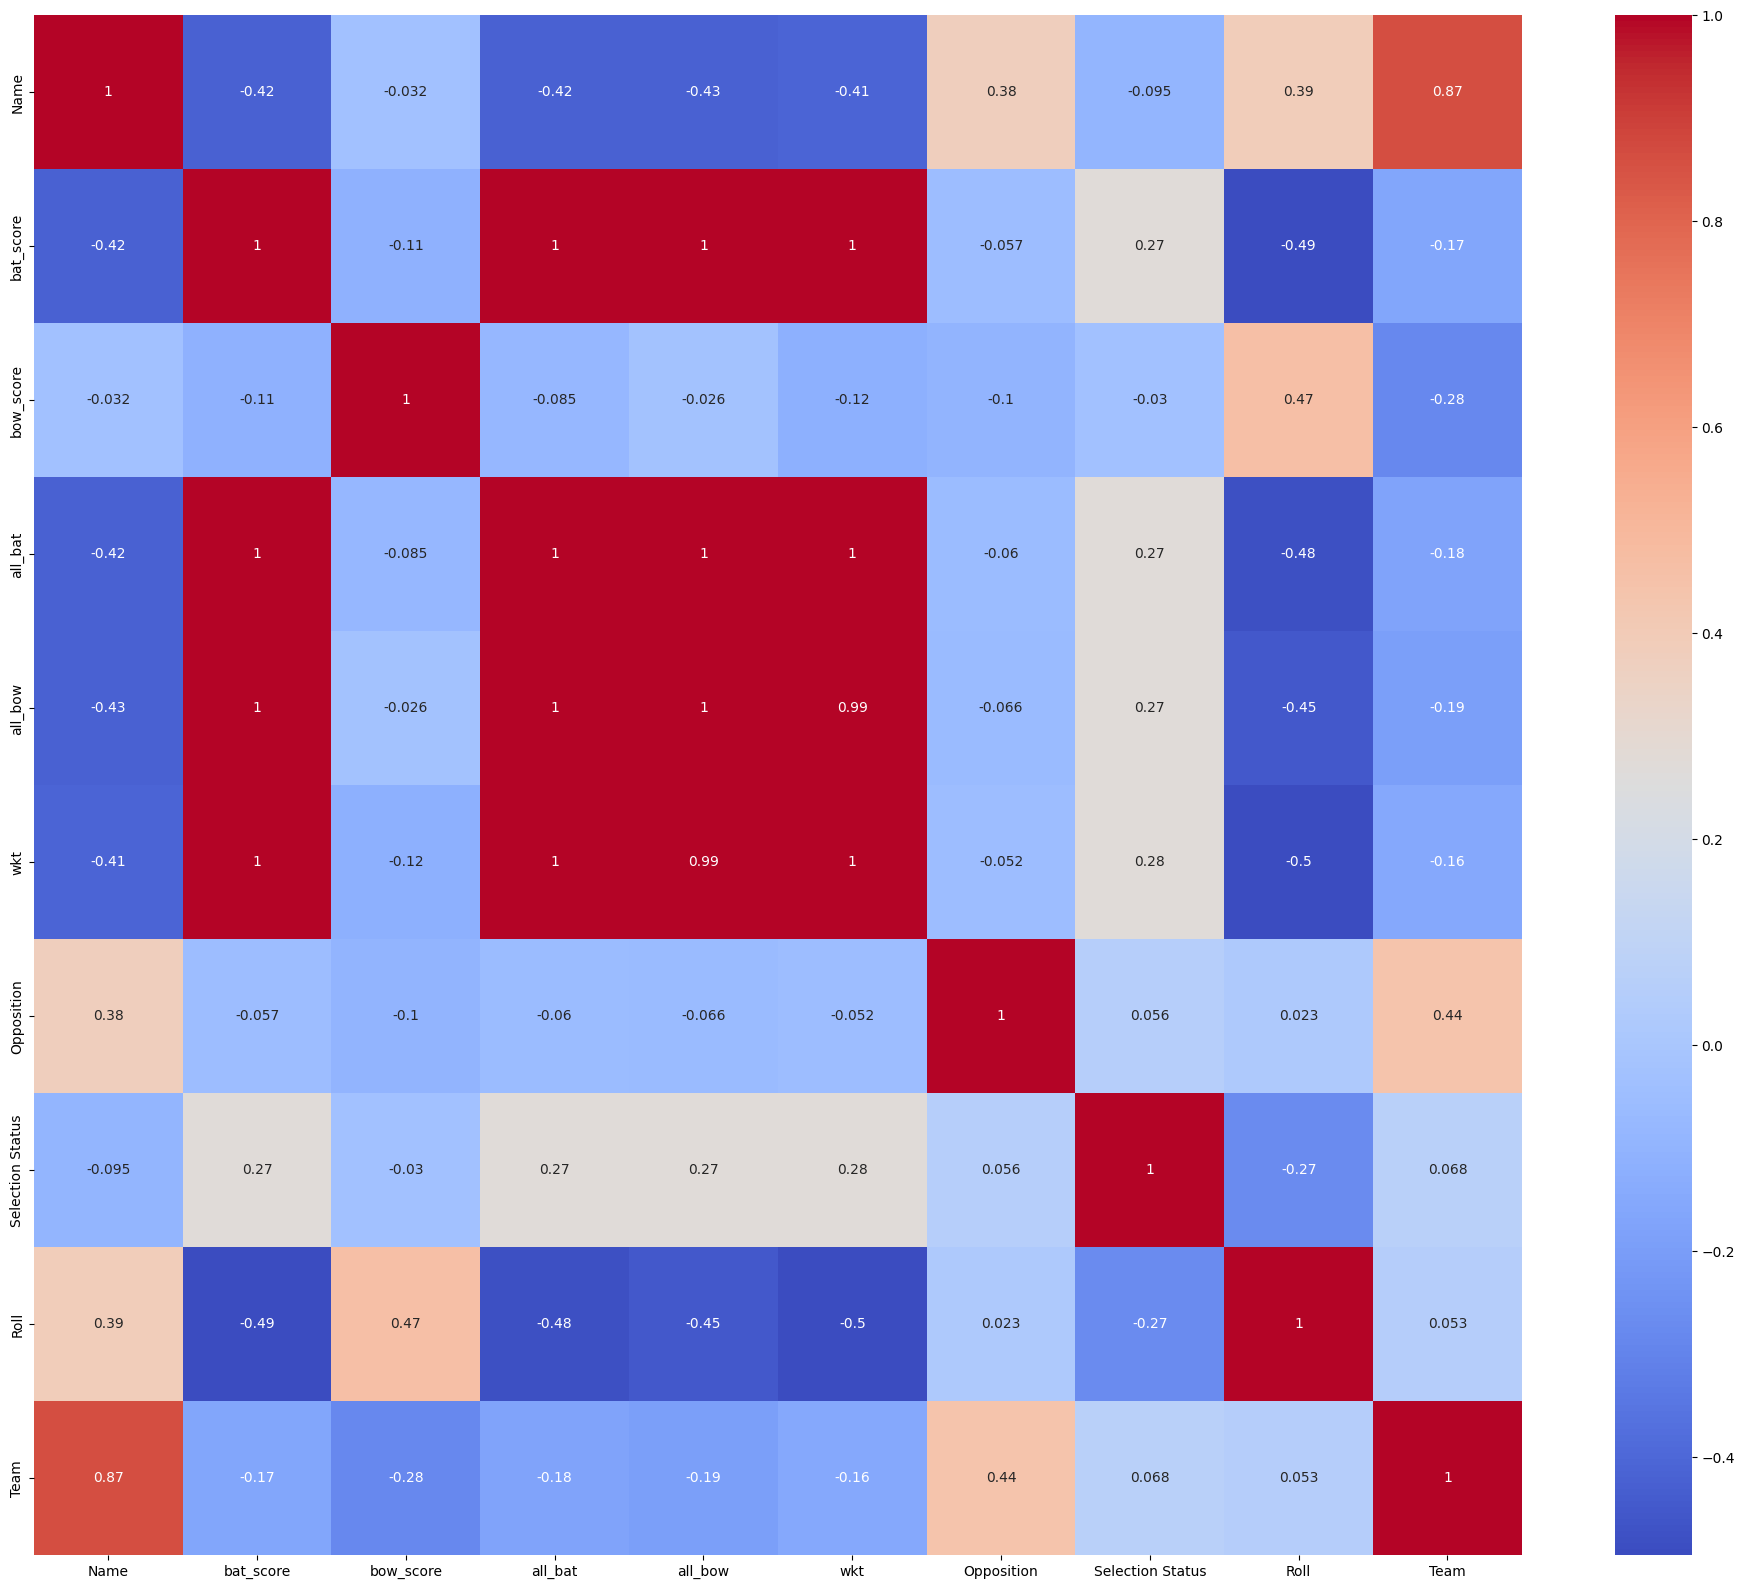

In [75]:
plt.figure(figsize=(24,20))
sns.heatmap(df4.corr(),annot=True,cmap='coolwarm')

>Spliting the x and y.

In [76]:
new_df = df4.drop(['Selection Status'],axis=1)

In [77]:
new_df

,Name,bat_score,bow_score,all_bat,all_bow,wkt,Opposition,Roll,Team
0,0,1363.84,41.73,958.86,760.54,613.73,0,0,0
1,1,895.60,31.59,630.08,500.48,403.02,0,0,0
2,2,0.00,0.00,0.00,0.00,0.00,0,0,0
3,3,0.00,0.00,0.00,0.00,0.00,0,0,0
4,4,0.00,0.00,0.00,0.00,0.00,0,0,0
...,...,...,...,...,...,...,...,...,...
760,29,67.49,172.02,64.44,80.12,30.37,3,2,1
761,30,3.94,47.34,7.49,14.00,1.77,3,2,1
762,31,0.00,0.00,0.00,0.00,0.00,3,2,1
763,32,0.00,0.00,0.00,0.00,0.00,3,2,1


>Preprocessing the data by spliting 15% test and 85% Training

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(new_df, df4["Selection Status"], random_state=42, test_size=0.15)

In [79]:
standard_scaler = StandardScaler().fit(x_train)
x_train_scaled = standard_scaler.transform(x_train)
x_test_scaled = standard_scaler.transform(x_test)

In [80]:
x_train_scaled.shape, x_test_scaled.shape

((650, 9), (115, 9))

In [81]:
import tensorflow as tf
from tensorflow import keras
tf.get_logger().setLevel('ERROR')
checkpoint_cb = keras.callbacks.ModelCheckpoint("keras_model.keras")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
lr_decay_cb = keras.callbacks.ReduceLROnPlateau(monitor='loss', patience=1, factor=0.5, min_lr=1e-8)

>I have use 2 hidden layer and one input layer and one output layer with one Neuron.

In [82]:
nn_model = keras.models.Sequential([
keras.layers.InputLayer(x_train_scaled.shape[1],),
keras.layers.Dense(256, activation="relu"),
keras.layers.Dense(32, activation="relu"),
keras.layers.Dense(1, activation="sigmoid")
])
nn_model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(), \
                 metrics=["accuracy", 'AUC'])

In [83]:
history = nn_model.fit(x_train_scaled, np.asanyarray(y_train).astype(np.float32),
                       epochs=100, batch_size=20, validation_split=0.15, callbacks=[early_stopping_cb], verbose=0)

>Graph of the Accuracy and loss of the NN used.

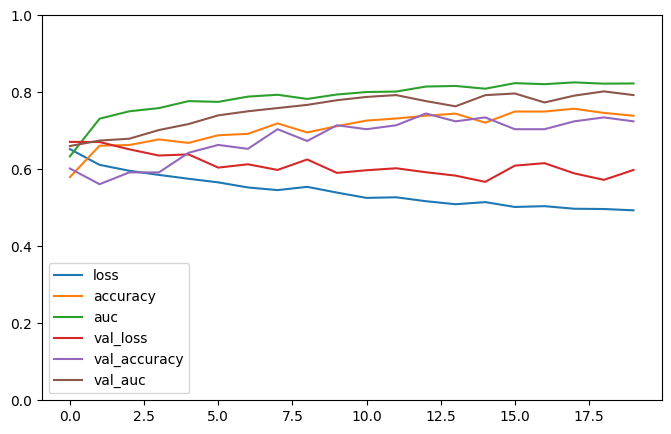

In [84]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.gca().set_ylim(0,1)
plt.show()

In [85]:
!pip install scikeras

In [86]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_validate

In [87]:
base_model = KerasClassifier(model=nn_model, batch_size=32, epochs=100, verbose=0)

In [88]:
score_type = ['accuracy', 'precision', 'recall', 'f1']

>Using the cross validate for optimizing the model.

In [89]:
score = cross_validate(base_model, x_train_scaled, y_train, cv=10, scoring = score_type, return_train_score=True, verbose=0)

>It is giving better accuracy then the above one.

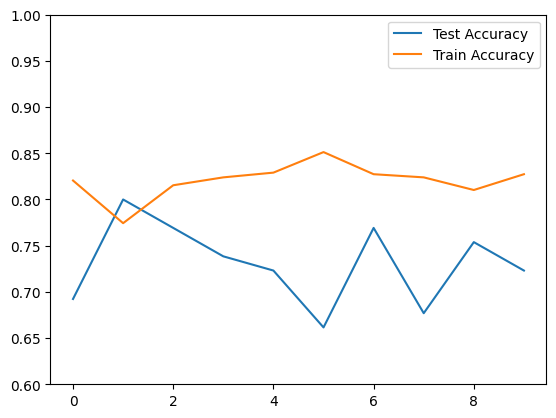

In [90]:
plt.plot(score['test_accuracy'])
plt.plot(score['train_accuracy'])

plt.legend(['Test Accuracy', 'Train Accuracy'], loc= "best")
plt.gca().set_ylim(0.6,1)
plt.show()

In [91]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(x_train_scaled.shape[1], ))

    for i in range(hp.Int('num_layers', 2, 6, default=3)):
        model.add(keras.layers.Dense(units=hp.Int('units_' + str(i), 8, 128, step=16), activation='relu'))

    if hp.Boolean('dropout'):
        model.add(keras.layers.Dropout(rate=0.4))

    model.add(keras.layers.Dense(1, activation="sigmoid"))

    model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7])), \
                  metrics=["accuracy", 'AUC', keras.metrics.Precision(), keras.metrics.Recall(), keras.metrics.F1Score()])

    return model

In [92]:
!pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.6 MB/s eta 0:00:00


In [93]:
import keras_tuner as kt

In [94]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=5,
    overwrite=True
)

>Hyperparameter Traing with given range of neurons in hidden layer and number of layers and it is giving the best model it can get in respective of accuracy and highest accuracy it acheived is approc 74%.

In [ ]:
tuner.search(x_train_scaled, np.asarray(y_train).astype(np.float32),
             validation_split=0.15, epochs=60, batch_size=32,
             callbacks=[early_stopping_cb, checkpoint_cb, lr_decay_cb])

Trial 20 Complete [00h 00m 47s]
val_accuracy: 0.7367347002029419

Best val_accuracy So Far: 0.759183669090271
Total elapsed time: 00h 25m 42s


In [ ]:
best_nn_model = tuner.get_best_models()[0]

In [ ]:
nn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               2560      
                                                                 
 dense_13 (Dense)            (None, 32)                8224      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 10817 (42.25 KB)
Trainable params: 10817 (42.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> Best model it can give better accuracy.

In [ ]:
best_nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 88)                880       
                                                                 
 dense_1 (Dense)             (None, 104)               9256      
                                                                 
 dense_2 (Dense)             (None, 40)                4200      
                                                                 
 dense_3 (Dense)             (None, 24)                984       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 15345 (59.94 KB)
Trainable params: 15345 (59.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


>Best giving 75.6% accuracy on our test data.

In [ ]:
nn_loss = best_nn_model.evaluate(x_test_scaled, np.asarray(y_test).astype(np.float32))

4/4 [==============================] - 1s 26ms/step - loss: 0.4938 - accuracy: 0.7565 - auc: 0.8456 - precision: 0.8214 - recall: 0.7188 - f1_score: 0.7151


> Now we wanted to see the probality of players in Indian and South African team.

In [95]:
df5 = pd.read_csv('Pre.csv')

In [96]:
df5.head()

,Name,bat_score,bow_score,all_bat,all_bow,wkt,Opposition,Roll,Match Date,Team
0,Virat,NaN,NaN,NaN,NaN,NaN,South Africa,Batsman,19 Nov 2023,0
1,Rohit,NaN,NaN,NaN,NaN,NaN,South Africa,Batsman,19 Nov 2023,0
2,Ishan,NaN,NaN,NaN,NaN,NaN,South Africa,Batsman,19 Nov 2023,0
3,Sheryas,NaN,NaN,NaN,NaN,NaN,South Africa,Batsman,19 Nov 2023,0
4,Rahul,NaN,NaN,NaN,NaN,NaN,South Africa,Batsman,19 Nov 2023,0


>Assigning the values to the Score using our algorithm.

In [97]:
ordinal_mapping = {'Batsman': 0, 'Allrounder': 1, 'Bowler': 2,'Bowling Allrounder':3}
df5['Roll'] = df5['Roll'].map(ordinal_mapping)
ordinal_mapping = {'Australia': 0, 'South Africa': 1, 'Sri Lanka': 2,'England':3,'New Zealand':4,'Bangladesh':5,'Pakistan':6,'Afghanistan':7\
                   ,'India':8,'Netherlands':9}
df5['Opposition'] = df5['Opposition'].map(ordinal_mapping)

>Computing the values.

In [98]:
for index, row in df5.iterrows():
    name = df5.at[index,'Name']
    date = df5.at[index,'Match Date']
    df5.at[index,'bat_score'] = round(count(df[df['Player']==name],date),2)
    df5.at[index,'bow_score'] = round(count2(df2[df2['Player']==name],date),2)
    df5.at[index,'all_bat'] = round(batall(name,date),2)
    df5.at[index,'all_bow'] = round(bowall(name,date),2)
    df5.at[index,'wkt'] = round(wek(df3[df3['Player']==name],name,date),2)

In [99]:
ordinal_mapping = {'Virat': 0, 'Rohit': 1, 'Ishan': 2,'Sheryas':3,'Rahul':4,'Shubman':5,'Hardik':6,'Jasprit':7,'Kuldeep':8,'Shami':9, \
                   'Axar':10,'Shardul':11,'Siraj':12,'Suryakumar':13,'Ashwin':14,'Jadeja':15,'Krishna':16,'Temba':17,'Quinton':18,\
                    'Rezza':19, 'Heinrich':20, 'Aiden':21, 'David':22, 'Rassie':23, 'Marco':24, 'Andile':25,'Gerald':26, 'Keshav':27\
                   , 'Lungi':28, 'Kagiso':29, 'Tabraiz':30, 'Lizzad':31,'Sisanda':32, 'Anrich':33}
df5['Name'] = df5['Name'].map(ordinal_mapping)

In [100]:
df5.head()

,Name,bat_score,bow_score,all_bat,all_bow,wkt,Opposition,Roll,Match Date,Team
0,0,2394.96,44.80,1680.95,1328.43,1077.73,1,0,19 Nov 2023,0
1,1,1837.29,31.59,1289.26,1018.41,826.78,1,0,19 Nov 2023,0
2,2,207.14,0.00,145.00,113.93,97.39,1,0,19 Nov 2023,0
3,3,435.94,0.00,305.16,239.77,196.17,1,0,19 Nov 2023,0
4,4,500.23,0.00,350.16,275.13,240.56,1,0,19 Nov 2023,0


>Removing the extra Columns.

In [101]:
df5 = df5.drop(['Match Date'],axis=1)

In [102]:
df5.head()

,Name,bat_score,bow_score,all_bat,all_bow,wkt,Opposition,Roll,Team
0,0,2394.96,44.80,1680.95,1328.43,1077.73,1,0,0
1,1,1837.29,31.59,1289.26,1018.41,826.78,1,0,0
2,2,207.14,0.00,145.00,113.93,97.39,1,0,0
3,3,435.94,0.00,305.16,239.77,196.17,1,0,0
4,4,500.23,0.00,350.16,275.13,240.56,1,0,0


In [103]:
standard_scaler = StandardScaler().fit(df5)
x_scaled = standard_scaler.transform(df5)

In [104]:
names=df5['Name']

In [ ]:
predictions = best_nn_model.predict(x_scaled)
for pair in zip(names, predictions):
    print(pair)

2/2 [==============================] - 0s 7ms/step
(0, array([0.7619606], dtype=float32))
(1, array([0.6808629], dtype=float32))
(2, array([0.6090789], dtype=float32))
(3, array([0.7649342], dtype=float32))
(4, array([0.77177715], dtype=float32))
(5, array([0.76482546], dtype=float32))
(7, array([0.6077687], dtype=float32))
(8, array([0.5792832], dtype=float32))
(9, array([0.53411925], dtype=float32))
(10, array([0.1554096], dtype=float32))
(11, array([0.5093929], dtype=float32))
(12, array([0.53587866], dtype=float32))
(13, array([0.6133822], dtype=float32))
(14, array([0.09703709], dtype=float32))
(15, array([0.4755145], dtype=float32))
(16, array([0.29081538], dtype=float32))
(17, array([0.8663944], dtype=float32))
(18, array([0.9960633], dtype=float32))
(19, array([0.3332293], dtype=float32))
(20, array([0.87567014], dtype=float32))
(21, array([0.92479736], dtype=float32))
(22, array([0.98534757], dtype=float32))
(23, array([0.9249013], dtype=float32))
(24, array([0.5582698], dtype

For indian players :

1. Rahul
2. Shreyas
3. Shubman
4. Virat
5. Rohit
6. Suryakumar
7. Ishan
8. Jasprit
9. Kuldeep
10. Siraj
11. Shami

For SA players :

1. Quinton
2. David
3. Aiden
4. Rassie
5. Henrich
6. Temba
7. Keshav
8. Lungi
9. Tabraiz
10. Kagiso
11. Marco

In [ ]:
import pickle
pickle_out = open("11players.pkl","wb")
pickle.dump(best_nn_model, pickle_out)
pickle_out.close()

In [ ]:
df5.to_csv('input.csv')